In [2]:
from pandas import DataFrame, read_csv

import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import sys

%matplotlib inline

In [3]:
print(f'Python version {sys.version}')
print(f'Pandas version {pd.__version__}')
print(f'Matplotlib version {matplotlib.__version__}')

Python version 3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]
Pandas version 1.0.4
Matplotlib version 3.2.1


In [4]:
names = ['Bob','Jessica','Mary','John','Mel']
births = [968, 155, 77, 578, 973]

In [6]:
babyDataSet = list(zip(names, births))
babyDataSet

[('Bob', 968), ('Jessica', 155), ('Mary', 77), ('John', 578), ('Mel', 973)]

In [10]:
df = DataFrame(data = babyDataSet, columns = ['Names', 'Births'])
df.to_csv('test.csv', index = False, header = False)

In [15]:
Location = r'D:/AutoscalingSim/autoscaling-simulator/test.csv'
df = read_csv(Location, names = ['Names', 'Births'])
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


In [16]:
import os
os.remove(Location)

In [18]:
df.dtypes
df.Births.dtype

dtype('int64')

In [22]:
df.sort_values?

In [25]:
df_sorted = df.sort_values('Births', ascending = False)
df_sorted.head(1)
df.Births.max()

973

The most popular name


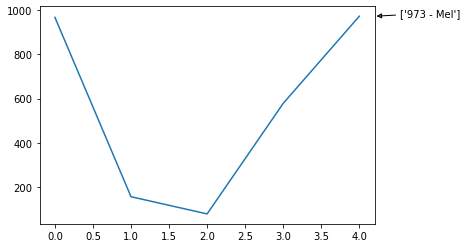

In [29]:
df['Births'].plot()
MaxValue = df.Births.max()
MaxName = df['Names'][df['Births'] == MaxValue].values
Text = str(MaxValue) + " - " + MaxName

plt.annotate(Text, xy = (1, MaxValue),
             xytext = (25, 0), xycoords = ('axes fraction', 'data'),
             textcoords = 'offset points', arrowprops = dict(arrowstyle = '-|>'))

print('The most popular name')

In [39]:
from numpy import random

random_names = [ names[random.randint(0, len(names))] for i in range(1000) ]
random_births = [ random.randint(0, 1000) for i in range(1000) ]
BabyDataSet = list(zip(random_names, random_births))
df = pd.DataFrame(data = BabyDataSet, columns = ['Names', 'Births'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Names   1000 non-null   object
 1   Births  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


         Births
Names          
John     109698
Bob      105405
Mel       96356
Jessica   95430
Mary      89958


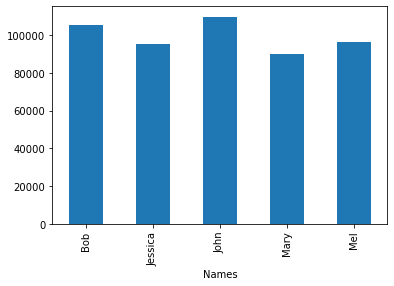

In [51]:
df1 = df.groupby('Names').sum()
df1['Births'].plot.bar()
print(df1.sort_values('Births', ascending = False))

In [118]:
random.seed(111)

def CreateDataSet(Number = 1):
    
    Output = list()
    
    for i in range(Number):
        
        rng = pd.date_range(start = '1/1/2016', end = '12/31/2020', freq = 'W-MON')
        data = random.randint(25, 1000, size = len(rng))
        status = [1,2,3]
        random_status = [ status[random.randint(0, len(status))] for i in range(len(rng)) ]
        states = ['GA','FL','fl','NY','NJ','TX']
        random_states = [ states[random.randint(0, len(states))] for i in range(len(rng)) ]
        
        Output.extend(zip(random_states, random_status, data, rng))
        
    return Output

In [119]:
dataset = CreateDataSet(4)
df = pd.DataFrame(data = dataset, columns = ['State', 'Status', 'CustomerCount', 'StatusDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   State          1044 non-null   object        
 1   Status         1044 non-null   int64         
 2   CustomerCount  1044 non-null   int64         
 3   StatusDate     1044 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 32.8+ KB


In [120]:
df.head()

,State,Status,CustomerCount,StatusDate
0,fl,2,877,2016-01-04
1,NY,2,901,2016-01-11
2,FL,3,749,2016-01-18
3,TX,3,111,2016-01-25
4,GA,3,300,2016-02-01


In [121]:
mask = df['Status'] == 1
df = df[mask]
df

,State,Status,CustomerCount,StatusDate
6,NY,1,347,2016-02-15
9,TX,1,992,2016-03-07
12,GA,1,293,2016-03-28
14,FL,1,474,2016-04-11
20,NJ,1,46,2016-05-23
...,...,...,...,...
1025,TX,1,54,2020-08-24
1027,GA,1,465,2020-09-07
1029,TX,1,866,2020-09-21
1032,NY,1,273,2020-10-12


In [122]:
mask = df.State == 'NJ'
df['State'][mask] = 'NY'
df

,State,Status,CustomerCount,StatusDate
6,NY,1,347,2016-02-15
9,TX,1,992,2016-03-07
12,GA,1,293,2016-03-28
14,FL,1,474,2016-04-11
20,NY,1,46,2016-05-23
...,...,...,...,...
1025,TX,1,54,2020-08-24
1027,GA,1,465,2020-09-07
1029,TX,1,866,2020-09-21
1032,NY,1,273,2020-10-12


In [123]:
df['State'] = df.State.apply(lambda x: x.upper())

In [124]:
df['State'].unique()

array(['NY', 'TX', 'GA', 'FL'], dtype=object)

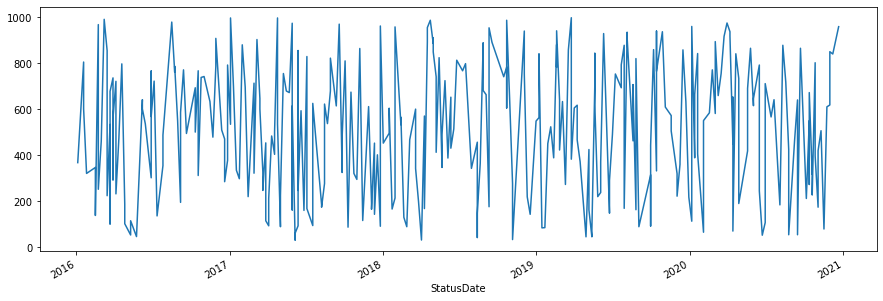

In [125]:
df = df.set_index('StatusDate')
df['CustomerCount'].plot(figsize = (15, 5))

In [126]:
sortdf = df[df['State'] == 'NY'].sort_index(axis = 0)
sortdf.head(10)

,State,Status,CustomerCount
StatusDate,,,
2016-02-15,NY,1,347
2016-02-15,NY,1,138
2016-02-29,NY,1,461
2016-03-14,NY,1,224
2016-03-21,NY,1,678
2016-03-28,NY,1,562
2016-04-04,NY,1,722
2016-04-25,NY,1,187
2016-05-09,NY,1,115


In [127]:
Daily = df.reset_index().groupby(['State', 'StatusDate']).sum()
Daily

Status  CustomerCount
State StatusDate                       
FL    2016-01-18       1            806
      2016-02-22       2           1221
      2016-03-21       2            635
      2016-03-28       1            737
      2016-04-04       1            232
...                  ...            ...
TX    2020-06-15       1            245
      2020-06-29       1            107
      2020-08-24       1             54
      2020-09-21       1            866
      2020-12-21       1            960

[279 rows x 2 columns]

In [128]:
del Daily['Status']
Daily.head()

CustomerCount
State StatusDate               
FL    2016-01-18            806
      2016-02-22           1221
      2016-03-21            635
      2016-03-28            737
      2016-04-04            232

In [129]:
Daily.index.levels[0]

Index(['FL', 'GA', 'NY', 'TX'], dtype='object', name='State')

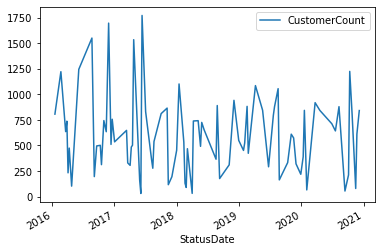

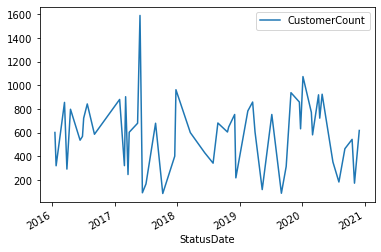

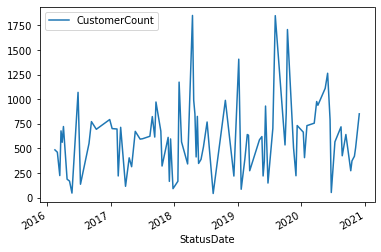

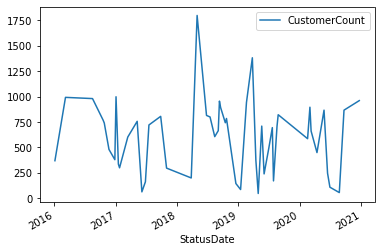

In [130]:
Daily.loc['FL'].plot()
Daily.loc['GA'].plot()
Daily.loc['NY'].plot()
Daily.loc['TX'].plot();

In [131]:
StateYearMonth = Daily.groupby([Daily.index.get_level_values(0), Daily.index.get_level_values(1).year, Daily.index.get_level_values(1).month])
Daily['Lower'] = StateYearMonth['CustomerCount'].transform( lambda x: x.quantile(q = .25) - (1.5 * x.quantile(q = .75) - x.quantile(q = .25)))
Daily['Upper'] = StateYearMonth['CustomerCount'].transform( lambda x: x.quantile(q = .75) + (1.5 * x.quantile(q = .75) - x.quantile(q = .25)))
Daily['Outlier'] = (Daily['CustomerCount'] < Daily['Lower']) | (Daily['CustomerCount'] > Daily['Upper'])
Daily1 = Daily[Daily['Outlier'] == False]

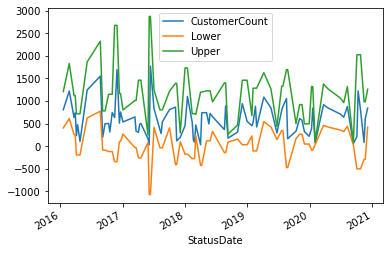

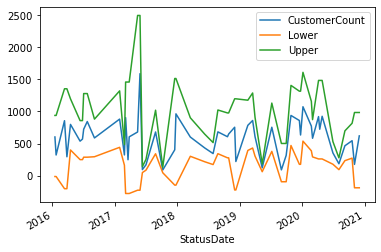

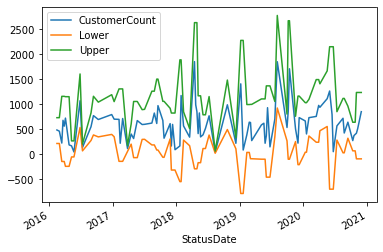

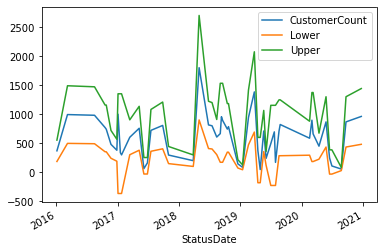

In [132]:
Daily1.loc['FL'].plot()
Daily1.loc['GA'].plot()
Daily1.loc['NY'].plot()
Daily1.loc['TX'].plot();

In [133]:
ALL = pd.DataFrame(Daily['CustomerCount'].groupby(Daily.index.get_level_values(1)).sum())
YearMonth = ALL.groupby([lambda x: x.year, lambda x: x.month])
ALL['MAX'] = YearMonth['CustomerCount'].transform(lambda x: x.max())
ALL.head()

,CustomerCount,MAX
StatusDate,,
2016-01-04,368,1408
2016-01-18,1408,1408
2016-01-25,321,1408
2016-02-15,485,1221
2016-02-22,1221,1221


In [134]:
data = [2000, 3000, 4000]
idx = pd.date_range(start = '12/31/2019', end = '12/31/2021', freq = 'A')
BHAG = pd.DataFrame(data, index = idx, columns = ['BHAG'])
BHAG

,BHAG
2019-12-31,2000
2020-12-31,3000
2021-12-31,4000


In [135]:
combined = pd.concat([ALL, BHAG], axis = 0)
combined = combined.sort_index(axis = 0)
combined.tail()

,CustomerCount,MAX,BHAG
2020-11-30,1470.0,1470.0,NaN
2020-12-07,841.0,960.0,NaN
2020-12-21,960.0,960.0,NaN
2020-12-31,NaN,NaN,3000.0
2021-12-31,NaN,NaN,4000.0


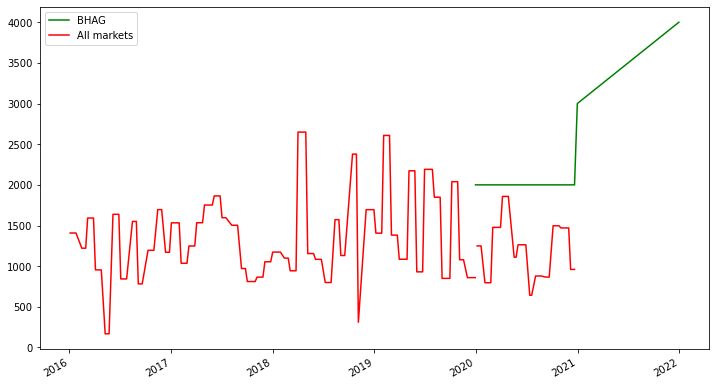

In [136]:
fig, axes = plt.subplots(figsize = (12, 7))

combined['BHAG'].fillna(method = 'pad').plot(color = 'green', label = 'BHAG')
combined['MAX'].plot(color = 'red', label = 'All markets')
plt.legend(loc = 'best');

In [137]:
Year = combined.groupby(lambda x: x.year).max()
Year

,CustomerCount,MAX,BHAG
2016,1696.0,1696.0,NaN
2017,1864.0,1864.0,NaN
2018,2649.0,2649.0,NaN
2019,2608.0,2608.0,2000.0
2020,1858.0,1858.0,3000.0
2021,NaN,NaN,4000.0


In [138]:
Year['YR_PCT_Change'] = Year['MAX'].pct_change(periods=  1)
Year

,CustomerCount,MAX,BHAG,YR_PCT_Change
2016,1696.0,1696.0,NaN,NaN
2017,1864.0,1864.0,NaN,0.099057
2018,2649.0,2649.0,NaN,0.421137
2019,2608.0,2608.0,2000.0,-0.015478
2020,1858.0,1858.0,3000.0,-0.287577
2021,NaN,NaN,4000.0,0.000000


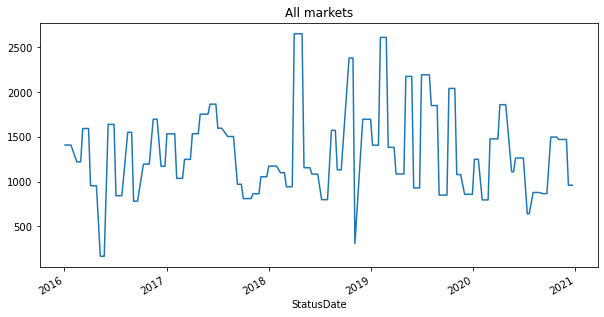

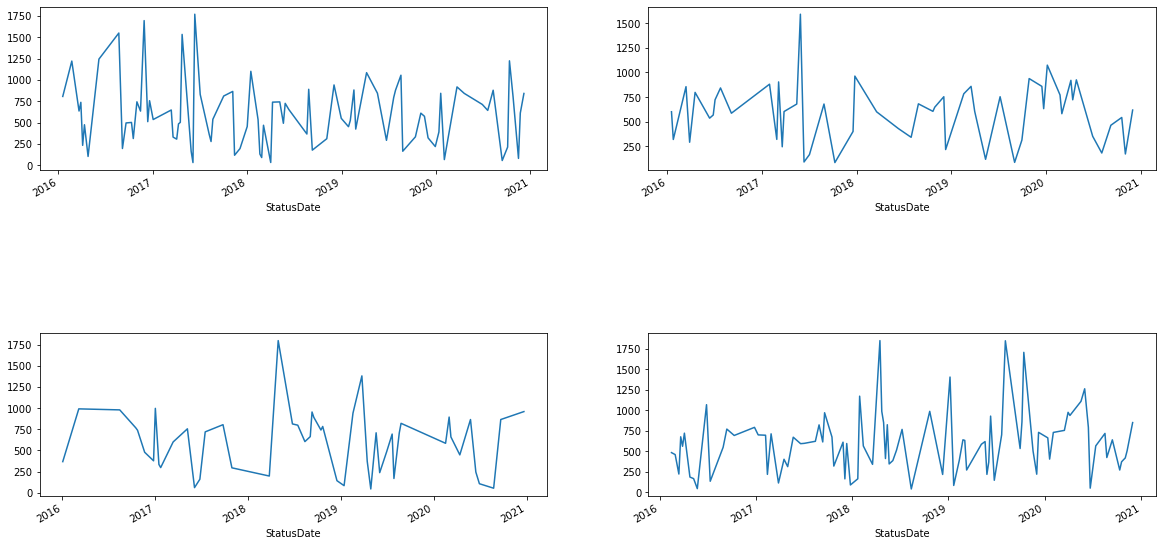

In [140]:
ALL['MAX'].plot(figsize = (10, 5));plt.title('All markets')

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 10))
fig.subplots_adjust(hspace = 1.0)

Daily.loc['FL']['CustomerCount']['2016':].fillna(method = 'pad').plot(ax = axes[0,0])
Daily.loc['GA']['CustomerCount']['2016':].fillna(method = 'pad').plot(ax = axes[0,1])
Daily.loc['TX']['CustomerCount']['2016':].fillna(method = 'pad').plot(ax = axes[1,0])
Daily.loc['NY']['CustomerCount']['2016':].fillna(method = 'pad').plot(ax = axes[1,1])

In [168]:
import pandas as pd

d = [0,1,2,3,4,5,6,7,8,9]
df = pd.DataFrame(data = d)
df.columns = ['Rev']
df['NewCol'] = 5
df['NewCol'] = df['NewCol'] + 1
del df['NewCol']
df['test'] = 3
df['col'] = df.Rev
i = ['a','b','c','d','e','f','g','h','i','j']
df.index = i
df.loc['a' :'g', ['Rev', 'test']]
df.loc?